# Whitefly Identification

# multi-object detection from Baidu Cloud

### detect object in img

In [1]:
## detect obj in img
import requests
import base64

def obj_dect(path):
    request_url = "https://aip.baidubce.com/rest/2.0/image-classify/v1/multi_object_detect"
    # 二进制方式打开图片文件
    f = open(path, 'rb')
    img = base64.b64encode(f.read())
    
    params = {"image":img}
    access_token = '[24.272eaa906dbf0878e20580f4893f8fdf.2592000.1628737328.282335-24508649]'
    request_url = request_url + "?access_token=" + access_token
    headers = {'content-type': 'application/x-www-form-urlencoded'}
    response = requests.post(request_url, data=params, headers=headers)
    if response:
        print (len(response.json()['result']))
    return response

path = 'C:/Users/LC/Desktop/2.png'
#path = './2222.jpg'
response = obj_dect(path)

KeyError: 'result'

### display results

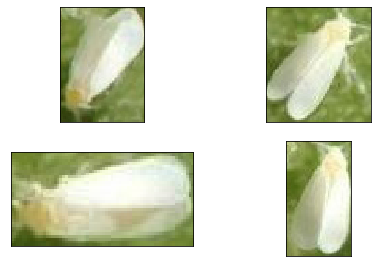

In [2]:
# display results
import matplotlib.pyplot as plt
import math
from PIL import Image

crop_size = response.json()
size_tmp = list()
for i in range(len(crop_size['result'])):
    tmp_var = crop_size['result'][i]['location']
    tmp_var = tuple((tmp_var['left'],tmp_var['top'],tmp_var['left']+tmp_var['width'],
                     tmp_var['top']+tmp_var['height']))
    size_tmp.append(tmp_var)
    
crop_size = size_tmp
img = Image.open(path)
img_lst = list()
for i in range(len(crop_size)):
    croped_img = img.crop(crop_size[i])
    img_lst.append(croped_img)

fig = plt.figure()
rect_size = math.ceil(math.sqrt(len(img_lst)))
if math.floor(math.sqrt(len(img_lst)))*math.ceil(math.sqrt(len(img_lst))) >len (img_lst):
    rect_size_a = math.floor(math.sqrt(len(img_lst)))
    rect_size_b = math.ceil(math.sqrt(len(img_lst)))
else:
    rect_size_a = rect_size_b = math.ceil(math.sqrt(len(img_lst)))

#img_lst.pop(2)
for i in range(len(img_lst)):
  plt.subplot(rect_size_a,rect_size_b,i+1)
  plt.tight_layout()
  plt.imshow(img_lst[i], interpolation='none')
  plt.xticks([])
  plt.yticks([])
plt.show()     

# SR + Cloud API

In [311]:
#http://examples-1251000004.cos.ap-shanghai.myqcloud.com/sample.jpeg?imageMogr2/thumbnail/!500p
## N等分图片
import cv2 
import math
import numpy as np

def croped_img(path,M):
    N = int(math.sqrt(M))
    srcImg = cv2.imread(path) # [2]将图片加载到内存
    w,h,dimsn = srcImg.shape
    croped_img_lst = list()
    for i in range(N):
        for j in range(N):
            img_roi = srcImg[(i*int(w/N)):((i+1)*int(w/N)), (j*int(h/N)):((j+1)*int(h/N))]
            croped_img_lst.append(img_roi)
    return croped_img_lst
        
path = './444_up.jpg'
croped_img_lst = croped_img(path,9)

In [312]:
cv2.imwrite('test_crop.jpg',croped_img_lst[5])
path = 'test_crop.jpg'
response = obj_dect(path)

1


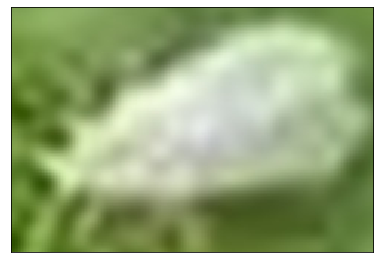

In [313]:
# display results
import matplotlib.pyplot as plt
import math
from PIL import Image

crop_size = response.json()
size_tmp = list()
for i in range(len(crop_size['result'])):
    tmp_var = crop_size['result'][i]['location']
    tmp_var = tuple((tmp_var['left'],tmp_var['top'],tmp_var['left']+tmp_var['width'],
                     tmp_var['top']+tmp_var['height']))
    size_tmp.append(tmp_var)
    
crop_size = size_tmp
img = Image.open(path)
img_lst = list()
for i in range(len(crop_size)):
    croped_img = img.crop(crop_size[i])
    img_lst.append(croped_img)

fig = plt.figure()
rect_size = math.ceil(math.sqrt(len(img_lst)))
if math.floor(math.sqrt(len(img_lst)))*math.ceil(math.sqrt(len(img_lst))) >len (img_lst):
    rect_size_a = math.floor(math.sqrt(len(img_lst)))
    rect_size_b = math.ceil(math.sqrt(len(img_lst)))
else:
    rect_size_a = rect_size_b = math.ceil(math.sqrt(len(img_lst)))

#img_lst.pop(2)
for i in range(len(img_lst)):
  plt.subplot(rect_size_a,rect_size_b,i+1)
  plt.tight_layout()
  plt.imshow(img_lst[i], interpolation='none')
  plt.xticks([])
  plt.yticks([])
plt.show()     

# Faster RCNN

### in colab

Detectron2_Tutorial.ipynb

# Binarization

In [159]:
## Binarization and del alien
import cv2
import numpy as np
from matplotlib import pyplot as plt

def pest_count(path):
    Img = cv2.imread(path, 0)
    blur = cv2.GaussianBlur(Img, (5, 5), 0)
    
    # binarization
    ret, otsu = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # findContours
    contours,_ = cv2.findContours(otsu, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    # draw cnt
    cv2.drawContours(Img, contours, -1, (255, 255, 255), 1)
    cv2.putText(Img, 'Insect Num:  ' + str(len(contours)), 
                (1, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
    
    # save img
    plt.title('Insect Num:  ' + str(len(contours)))
    cv2.imwrite('./result.jpg',Img)
    plt.imshow(Img,'gray')
    plt.xticks([]), plt.yticks([])
    plt.show()
    
## del alien object
import numpy as np

contour_area = list()
for i  in range(len(contours)):
    tmp_area = cv2.contourArea(contours[i],oriented = False)
    contour_area.append(tmp_area) 

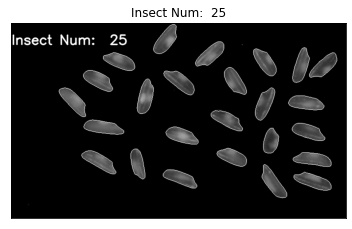

In [161]:
path = 'rice.png'
pest_count(path)

# Objective Counting API: Not Available Right Now

In [ ]:
# import
import csv
import random
import math
import operator
import cv2
import collections
import functools
import matplotlib.pyplot as plt
import numpy as np
import PIL.Image as Image
import PIL.ImageColor as ImageColor
import PIL.ImageDraw as ImageDraw
import PIL.ImageFont as ImageFont
import six
import tensorflow as tf
import cv2
import numpy
import os
            
def crop_center(img,cropx,cropy): # to crop and get the center of the given image
    y,x, channels = img.shape
    startx = x//2-(cropx//2)
    starty = y//2-(cropy//2)  
  
    return img[starty:starty+cropy,startx:startx+cropx]

def word_count(str):
    counts = dict()
    words = str.split()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts

# calculation of euclidead distance    
def calculateEuclideanDistance(variable1, variable2, length):
    distance = 0
    for x in range(length):
        distance += pow((variable1[x] - variable2[x]), 2)
    return math.sqrt(distance)
    
# get k nearest neigbors
def kNearestNeighbors(training_feature_vector, testInstance, k):
    distances = []
    length = len(testInstance)
    for x in range(len(training_feature_vector)):
        dist = calculateEuclideanDistance(testInstance, training_feature_vector[x], length)
        distances.append((training_feature_vector[x], dist))
    distances.sort(key = operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors
   
# votes of neighbors 
def responseOfNeighbors(neighbors):
    all_possible_neighbors = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in all_possible_neighbors:
            all_possible_neighbors[response] += 1
        else:
            all_possible_neighbors[response] = 1
    sortedVotes = sorted(all_possible_neighbors.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]
    
# Load image feature data to training feature vectors and test feature vector
def loadDataset(filename, filename2, training_feature_vector=[] , test_feature_vector=[]):
    with open(filename) as csvfile:
        lines = csv.reader(csvfile)
        dataset = list(lines)
        for x in range(len(dataset)):
            for y in range(3):
                dataset[x][y] = float(dataset[x][y])
            training_feature_vector.append(dataset[x])

    with open(filename2) as csvfile:
        lines = csv.reader(csvfile)
        dataset = list(lines)
        for x in range(len(dataset)):
            for y in range(3):
                dataset[x][y] = float(dataset[x][y])
            test_feature_vector.append(dataset[x])
                
def main(training_data, test_data):
    training_feature_vector=[] #training feature vector
    test_feature_vector=[] #test feature vector
    loadDataset(training_data, test_data, training_feature_vector, test_feature_vector)
    classifier_prediction=[] #predictions   
    k = 3  # K value of k nearest neighbor
    for x in range(len(test_feature_vector)):
        neighbors = kNearestNeighbors(training_feature_vector, test_feature_vector[x], k)
        result = responseOfNeighbors(neighbors)
        classifier_prediction.append(result)
    return classifier_prediction[0]

# color_histogram_of_test_image
from PIL import Image
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import itemfreq
current_path = os.getcwd()

def color_histogram_of_test_image(test_src_image):
	#load the image
	image = test_src_image

	chans = cv2.split(image)
	colors = ("b", "g", "r")
	features = []
	feature_data = ""
	counter = 0
	for (chan, color) in zip(chans, colors):
		counter = counter + 1
	
		hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
		features.extend(hist)
	
		# find the peak pixel values for R, G, and B
		elem = np.argmax(hist)

		if (counter == 1):
			blue = str(elem)
		elif (counter ==2):
			green = str(elem)
		elif (counter ==3):
			red = str(elem)
			feature_data = red + "," + green + "," + blue
	with open(current_path+"/utils/color_recognition_module/"+"test.data", "w") as myfile:						
		myfile.write(feature_data)

def color_histogram_of_training_image(img_name):
	
	# detect image color by using image file name to label training data
	if "red" in img_name:
		data_source = "red"
	elif "yellow" in img_name:
		data_source = "yellow"
	elif "green" in img_name:
		data_source = "green"
	elif "orange" in img_name:
		data_source = "orange"
	elif "white" in img_name:
		data_source = "white"
	elif "black" in img_name:
		data_source = "black"
	elif "blue" in img_name:
		data_source = "blue"
	elif "violet" in img_name:
		data_source = "violet"

	#load the image
	image = cv2.imread(img_name)

	chans = cv2.split(image)
	colors = ("b", "g", "r")
	features = []
	feature_data = ""
	counter = 0
	for (chan, color) in zip(chans, colors):
		counter = counter + 1
		
		hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
		features.extend(hist)
		
		# find the peak pixel values for R, G, and B
		elem = np.argmax(hist)

		if (counter == 1):
			blue = str(elem)
		elif (counter ==2):
			green = str(elem)
		elif (counter ==3):
			red = str(elem)
			feature_data = red + "," + green + "," + blue

	with open("training.data", "a") as myfile:		
		myfile.write(feature_data + "," + data_source + "\n")
	
def training():
	#red color training images
	for f in os.listdir("./training_dataset/red"):
		color_histogram_of_training_image("./training_dataset/red/"+f)

	#yellow color training images
	for f in os.listdir("./training_dataset/yellow"):
		color_histogram_of_training_image("./training_dataset/yellow/"+f)

	#green color training images
	for f in os.listdir("./training_dataset/green"):
		color_histogram_of_training_image("./training_dataset/green/"+f)

	#orange color training images
	for f in os.listdir("./training_dataset/orange"):
		color_histogram_of_training_image("./training_dataset/orange/"+f)

	#white color training images
	for f in os.listdir("./training_dataset/white"):
		color_histogram_of_training_image("./training_dataset/white/"+f)

	#black color training images
	for f in os.listdir("./training_dataset/black"):
		color_histogram_of_training_image("./training_dataset/black/"+f)

	#blue color training images
	for f in os.listdir("./training_dataset/blue"):
		color_histogram_of_training_image("./training_dataset/blue/"+f)
        
object_count = [0]

current_path = os.getcwd()
the_path = current_path + "/detected_objects/"
def save_image(source_image):
	cv2.imwrite(the_path + "object" + str(len(object_count)) + ".png", source_image)
	object_count.insert(0,1)
	print("*detected object image saved: "+ the_path)
    
# count_objects_x_axis
is_object_detected = [0]
left_position_of_previous_detected_object = [0]

def count_objects_x_axis(top, bottom, right, left, crop_img, roi_position, y_min, y_max, deviation):   
        direction = "n.a." # means not available, it is just initialization
        isInROI = True # is the object that is inside Region Of Interest
        update_csv = False

        if (abs(((right+left)/2)-roi_position) < deviation):
            is_object_detected.insert(0,1)
            update_csv = True
            image_saver.save_image(crop_img) # save detected object image

        if(left < left_position_of_previous_detected_object[0]):
            direction = "left"
        else:
            direction = "right"

        left_position_of_previous_detected_object.insert(0,(left))

        return direction, is_object_detected, update_csv
    
# color_recognition
import os
current_path = os.getcwd()

def color_recognition(crop_img):
 
  height, width, channels = crop_img.shape
  crop_img = crop_image.crop_center(crop_img, 50, 50) # crop the detected object image and get a image piece from center of it both for debugging and sending that image piece to color recognition module
  # for debugging
  #cv2.imwrite(current_path + "/debug_utility"+".png",crop_img) # save image piece for debugging
  open(current_path+"/utils/color_recognition_module/"+"test.data", "w")   
  color_histogram_feature_extraction.color_histogram_of_test_image(crop_img) # send image piece to regonize object color
  prediction = knn_classifier.main(current_path + "/utils/color_recognition_module/" + "training.data", current_path + "/utils/color_recognition_module/" + "test.data")

  return prediction


# Variables
is_object_detected = [0]
roi_position = [0]
deviation_value = [0]
is_color_recognition_enable = [0]
x_axis = [0]
y_axis = [0]
standalone_image = [0]

_TITLE_LEFT_MARGIN = 10
_TITLE_TOP_MARGIN = 10

STANDARD_COLORS = [
    'AliceBlue', 'Chartreuse', 'Aqua', 'Aquamarine', 'Azure', 'Beige', 'Bisque',
    'BlanchedAlmond', 'BlueViolet', 'BurlyWood', 'CadetBlue', 'AntiqueWhite',
    'Chocolate', 'Coral', 'CornflowerBlue', 'Cornsilk', 'Crimson', 'Cyan',
    'DarkCyan', 'DarkGoldenRod', 'DarkGrey', 'DarkKhaki', 'DarkOrange',
    'DarkOrchid', 'DarkSalmon', 'DarkSeaGreen', 'DarkTurquoise', 'DarkViolet',
    'DeepPink', 'DeepSkyBlue', 'DodgerBlue', 'FireBrick', 'FloralWhite',
    'ForestGreen', 'Fuchsia', 'Gainsboro', 'GhostWhite', 'Gold', 'GoldenRod',
    'Salmon', 'Tan', 'HoneyDew', 'HotPink', 'IndianRed', 'Ivory', 'Khaki',
    'Lavender', 'LavenderBlush', 'LawnGreen', 'LemonChiffon', 'LightBlue',
    'LightCoral', 'LightCyan', 'LightGoldenRodYellow', 'LightGray', 'LightGrey',
    'LightGreen', 'LightPink', 'LightSalmon', 'LightSeaGreen', 'LightSkyBlue',
    'LightSlateGray', 'LightSlateGrey', 'LightSteelBlue', 'LightYellow', 'Lime',
    'LimeGreen', 'Linen', 'Magenta', 'MediumAquaMarine', 'MediumOrchid',
    'MediumPurple', 'MediumSeaGreen', 'MediumSlateBlue', 'MediumSpringGreen',
    'MediumTurquoise', 'MediumVioletRed', 'MintCream', 'MistyRose', 'Moccasin',
    'NavajoWhite', 'OldLace', 'Olive', 'OliveDrab', 'Orange', 'OrangeRed',
    'Orchid', 'PaleGoldenRod', 'PaleGreen', 'PaleTurquoise', 'PaleVioletRed',
    'PapayaWhip', 'PeachPuff', 'Peru', 'Pink', 'Plum', 'PowderBlue', 'Purple',
    'Red', 'RosyBrown', 'RoyalBlue', 'SaddleBrown', 'Green', 'SandyBrown',
    'SeaGreen', 'SeaShell', 'Sienna', 'Silver', 'SkyBlue', 'SlateBlue',
    'SlateGray', 'SlateGrey', 'Snow', 'SpringGreen', 'SteelBlue', 'GreenYellow',
    'Teal', 'Thistle', 'Tomato', 'Turquoise', 'Violet', 'Wheat', 'White',
    'WhiteSmoke', 'Yellow', 'YellowGreen'
]

current_path = os.getcwd()

def _visualize_boxes(image, boxes, classes, scores, category_index, **kwargs):
  return visualize_boxes_and_labels_on_image_array_tracker(
      image, boxes, classes, scores, category_index=category_index, **kwargs)

def _visualize_boxes_and_masks(image, boxes, classes, scores, masks,
                               category_index, **kwargs):
  return visualize_boxes_and_labels_on_image_array_tracker(
      image,
      boxes,
      classes,
      scores,
      category_index=category_index,
      instance_masks=masks,
      **kwargs)

def _visualize_boxes_and_keypoints(image, boxes, classes, scores, keypoints,
                                   category_index, **kwargs):
  return visualize_boxes_and_labels_on_image_array_tracker(
      image,
      boxes,
      classes,
      scores,
      category_index=category_index,
      keypoints=keypoints,
      **kwargs)

def _visualize_boxes_and_masks_and_keypoints(
    image, boxes, classes, scores, masks, keypoints, category_index, **kwargs):
  return visualize_boxes_and_labels_on_image_array_tracker(
      image,
      boxes,
      classes,
      scores,
      category_index=category_index,
      instance_masks=masks,
      keypoints=keypoints,
      **kwargs)

def save_image_array_as_png(image, output_path):
  """Saves an image (represented as a numpy array) to PNG.
  Args:
    image: a numpy array with shape [height, width, 3].
    output_path: path to which image should be written.
  """
  image_pil = Image.fromarray(np.uint8(image)).convert('RGB')
  with tf.gfile.Open(output_path, 'w') as fid:
    image_pil.save(fid, 'PNG')

def encode_image_array_as_png_str(image):
  """Encodes a numpy array into a PNG string.
  Args:
    image: a numpy array with shape [height, width, 3].
  Returns:
    PNG encoded image string.
  """
  image_pil = Image.fromarray(np.uint8(image))
  output = six.BytesIO()
  image_pil.save(output, format='PNG')
  png_string = output.getvalue()
  output.close()
  return png_string

def draw_bounding_box_on_image_array(current_frame_number, image,
                                     ymin,
                                     xmin,
                                     ymax,
                                     xmax,
                                     color='red',
                                     thickness=4,
                                     display_str_list=(),
                                     use_normalized_coordinates=True):
  """Adds a bounding box to an image (numpy array).
  Args:
    image: a numpy array with shape [height, width, 3].
    ymin: ymin of bounding box in normalized coordinates (same below).
    xmin: xmin of bounding box.
    ymax: ymax of bounding box.
    xmax: xmax of bounding box.
    color: color to draw bounding box. Default is red.
    thickness: line thickness. Default value is 4.
    display_str_list: list of strings to display in box
                      (each to be shown on its own line).
    use_normalized_coordinates: If True (default), treat coordinates
      ymin, xmin, ymax, xmax as relative to the image.  Otherwise treat
      coordinates as absolute.
  """
  image_pil = Image.fromarray(np.uint8(image)).convert('RGB')
  is_object_detected, csv_line, update_csv = draw_bounding_box_on_image(current_frame_number,image_pil, ymin, xmin, ymax, xmax, color,
                             thickness, display_str_list,
                             use_normalized_coordinates)
  np.copyto(image, np.array(image_pil))
  return is_object_detected, csv_line, update_csv

def draw_bounding_box_on_image(current_frame_number,image,
                               ymin,
                               xmin,
                               ymax,
                               xmax,
                               color='red',
                               thickness=4,
                               display_str_list=(),
                               use_normalized_coordinates=True):
  """Adds a bounding box to an image.
  Each string in display_str_list is displayed on a separate line above the
  bounding box in black text on a rectangle filled with the input 'color'.
  If the top of the bounding box extends to the edge of the image, the strings
  are displayed below the bounding box.
  Args:
    image: a PIL.Image object.
    ymin: ymin of bounding box.
    xmin: xmin of bounding box.
    ymax: ymax of bounding box.
    xmax: xmax of bounding box.
    color: color to draw bounding box. Default is red.
    thickness: line thickness. Default value is 4.
    display_str_list: list of strings to display in box
                      (each to be shown on its own line).
    use_normalized_coordinates: If True (default), treat coordinates
      ymin, xmin, ymax, xmax as relative to the image.  Otherwise treat
      coordinates as absolute.
  """
  image_temp = numpy.array(image)
  csv_line = "" # to create new csv line consists of object type, predicted_speed, color and predicted_direction
  update_csv = False # update csv for a new object that are passed from ROI - just one new line for each objects
  is_object_detected = [0]
  draw = ImageDraw.Draw(image)
  im_width, im_height = image.size
  if use_normalized_coordinates:
    (left, right, top, bottom) = (xmin * im_width, xmax * im_width,
                                  ymin * im_height, ymax * im_height)
  else:
    (left, right, top, bottom) = (xmin, xmax, ymin, ymax)
  draw.line([(left, top), (left, bottom), (right, bottom),
             (right, top), (left, top)], width=thickness, fill=color)

  predicted_direction = "n.a." # means not available, it is just initialization


  detected_object_image = image_temp[int(top):int(bottom), int(left):int(right)]

  '''if(bottom > roi_position): # if the object get in ROI area, object predicted_speed predicted_color algorithms are called - 200 is an arbitrary value, for my case it looks very well to set position of ROI line at y pixel 200'''
  if(x_axis[0] == 1):
    predicted_direction, is_object_detected, update_csv = object_counter_x_axis.count_objects_x_axis(top, bottom, right, left, detected_object_image, roi_position[0], roi_position[0]+deviation_value[0], roi_position[0]+(deviation_value[0]*2), deviation_value[0])
  elif(y_axis[0] == 1):
    predicted_direction, is_object_detected, update_csv = object_counter_y_axis.count_objects(top, bottom, right, left, detected_object_image, roi_position[0], roi_position[0]+deviation_value[0], roi_position[0]+(deviation_value[0]*2), deviation_value[0])
  elif(standalone_image[0] == 1):
    image_saver.save_image(detected_object_image) # save detected object image

  if(is_color_recognition_enable[0]):
    predicted_color = color_recognition_api.color_recognition(detected_object_image)    
  
  try:
    font = ImageFont.truetype('arial.ttf', 16)
  except IOError:
    font = ImageFont.load_default()

  # If the total height of the display strings added to the top of the bounding
  # box exceeds the top of the image, stack the strings below the bounding box
  # instead of above.
  if(is_color_recognition_enable[0]):
    display_str_list[0] = predicted_color + " " + display_str_list[0]
    csv_line = predicted_color + "," + str (predicted_direction) # csv line created
  else:
    display_str_list[0] = display_str_list[0]
    csv_line = str (predicted_direction) # csv line created
  
  display_str_heights = [font.getsize(ds)[1] for ds in display_str_list]

  # Each display_str has a top and bottom margin of 0.05x.
  total_display_str_height = (1 + 2 * 0.05) * sum(display_str_heights)

  if top > total_display_str_height:
    text_bottom = top
  else:
    text_bottom = bottom + total_display_str_height

  # Reverse list and print from bottom to top.
  for display_str in display_str_list[::-1]:
    text_width, text_height = font.getsize(display_str)
    margin = np.ceil(0.05 * text_height)
    draw.rectangle(
        [(left, text_bottom - text_height - 2 * margin), (left + text_width,
                                                          text_bottom)],
        fill=color)
    draw.text(
        (left + margin, text_bottom - text_height - margin),
        display_str,
        fill='black',
        font=font)
    text_bottom -= text_height - 2 * margin
    return is_object_detected, csv_line, update_csv

def draw_bounding_boxes_on_image_array(image,
                                       boxes,
                                       color='red',
                                       thickness=4,
                                       display_str_list_list=()):
  """Draws bounding boxes on image (numpy array).
  Args:
    image: a numpy array object.
    boxes: a 2 dimensional numpy array of [N, 4]: (ymin, xmin, ymax, xmax).
           The coordinates are in normalized format between [0, 1].
    color: color to draw bounding box. Default is red.
    thickness: line thickness. Default value is 4.
    display_str_list_list: list of list of strings.
                           a list of strings for each bounding box.
                           The reason to pass a list of strings for a
                           bounding box is that it might contain
                           multiple labels.
  Raises:
    ValueError: if boxes is not a [N, 4] array
  """
  image_pil = Image.fromarray(image)
  draw_bounding_boxes_on_image(image_pil, boxes, color, thickness, display_str_list_list)
  np.copyto(image, np.array(image_pil))

def draw_bounding_boxes_on_image(image,
                                 boxes,
                                 color='red',
                                 thickness=4,
                                 display_str_list_list=()):
  """Draws bounding boxes on image.
  Args:
    image: a PIL.Image object.
    boxes: a 2 dimensional numpy array of [N, 4]: (ymin, xmin, ymax, xmax).
           The coordinates are in normalized format between [0, 1].
    color: color to draw bounding box. Default is red.
    thickness: line thickness. Default value is 4.
    display_str_list_list: list of list of strings.
                           a list of strings for each bounding box.
                           The reason to pass a list of strings for a
                           bounding box is that it might contain
                           multiple labels.
  Raises:
    ValueError: if boxes is not a [N, 4] array
  """
  boxes_shape = boxes.shape
  if not boxes_shape:
    return
  if len(boxes_shape) != 2 or boxes_shape[1] != 4:
    raise ValueError('Input must be of size [N, 4]')
  for i in range(boxes_shape[0]):
    display_str_list = ()
    if display_str_list_list:
      display_str_list = display_str_list_list[i]
    
    draw_bounding_box_on_image(image, boxes[i, 0], boxes[i, 1], boxes[i, 2],
                               boxes[i, 3], color, thickness, display_str_list)

def draw_bounding_boxes_on_image_tensors(images,
                                         boxes,
                                         classes,
                                         scores,
                                         category_index,
                                         max_boxes_to_draw=20,
                                         min_score_thresh=0.2):
  """Draws bounding boxes on batch of image tensors.
  Args:
    images: A 4D uint8 image tensor of shape [N, H, W, C].
    boxes: [N, max_detections, 4] float32 tensor of detection boxes.
    classes: [N, max_detections] int tensor of detection classes. Note that
      classes are 1-indexed.
    scores: [N, max_detections] float32 tensor of detection scores.
    category_index: a dict that maps integer ids to category dicts. e.g.
      {1: {1: 'dog'}, 2: {2: 'cat'}, ...}
    max_boxes_to_draw: Maximum number of boxes to draw on an image. Default 20.
    min_score_thresh: Minimum score threshold for visualization. Default 0.2.
  Returns:
    4D image tensor of type uint8, with boxes drawn on top.
  """
  visualize_boxes_fn = functools.partial(
      visualize_boxes_and_labels_on_image_array,
      category_index=category_index,
      instance_masks=None,
      keypoints=None,
      use_normalized_coordinates=True,
      max_boxes_to_draw=max_boxes_to_draw,
      min_score_thresh=min_score_thresh,
      agnostic_mode=False,
      line_thickness=4)

  def draw_boxes(image_boxes_classes_scores):
    """Draws boxes on image."""
    (image, boxes, classes, scores) = image_boxes_classes_scores
    image_with_boxes = tf.py_func(visualize_boxes_fn,
                                  [image, boxes, classes, scores], tf.uint8)
    return image_with_boxes

  images = tf.map_fn(
      draw_boxes, (images, boxes, classes, scores),
      dtype=tf.uint8,
      back_prop=False)
  return images

def draw_keypoints_on_image_array(image,
                                  keypoints,
                                  color='red',
                                  radius=2,
                                  use_normalized_coordinates=True):
  """Draws keypoints on an image (numpy array).
  Args:
    image: a numpy array with shape [height, width, 3].
    keypoints: a numpy array with shape [num_keypoints, 2].
    color: color to draw the keypoints with. Default is red.
    radius: keypoint radius. Default value is 2.
    use_normalized_coordinates: if True (default), treat keypoint values as
      relative to the image.  Otherwise treat them as absolute.
  """
  image_pil = Image.fromarray(np.uint8(image)).convert('RGB')
  draw_keypoints_on_image(image_pil, keypoints, color, radius,
                          use_normalized_coordinates)
  np.copyto(image, np.array(image_pil))

def draw_keypoints_on_image(image,
                            keypoints,
                            color='red',
                            radius=2,
                            use_normalized_coordinates=True):
  """Draws keypoints on an image.
  Args:
    image: a PIL.Image object.
    keypoints: a numpy array with shape [num_keypoints, 2].
    color: color to draw the keypoints with. Default is red.
    radius: keypoint radius. Default value is 2.
    use_normalized_coordinates: if True (default), treat keypoint values as
      relative to the image.  Otherwise treat them as absolute.
  """
  draw = ImageDraw.Draw(image)
  im_width, im_height = image.size
  keypoints_x = [k[1] for k in keypoints]
  keypoints_y = [k[0] for k in keypoints]
  if use_normalized_coordinates:
    keypoints_x = tuple([im_width * x for x in keypoints_x])
    keypoints_y = tuple([im_height * y for y in keypoints_y])
  for keypoint_x, keypoint_y in zip(keypoints_x, keypoints_y):
    draw.ellipse([(keypoint_x - radius, keypoint_y - radius),
                  (keypoint_x + radius, keypoint_y + radius)],
                 outline=color, fill=color)

def draw_mask_on_image_array(image, mask, color='red', alpha=0.7):
  """Draws mask on an image.
  Args:
    image: uint8 numpy array with shape (img_height, img_height, 3)
    mask: a uint8 numpy array of shape (img_height, img_height) with
      values between either 0 or 1.
    color: color to draw the keypoints with. Default is red.
    alpha: transparency value between 0 and 1. (default: 0.7)
  Raises:
    ValueError: On incorrect data type for image or masks.
  """
  if image.dtype != np.uint8:
    raise ValueError('`image` not of type np.uint8')
  if mask.dtype != np.uint8:
    raise ValueError('`mask` not of type np.uint8')
  if np.any(np.logical_and(mask != 1, mask != 0)):
    raise ValueError('`mask` elements should be in [0, 1]')
  rgb = ImageColor.getrgb(color)
  pil_image = Image.fromarray(image)

  solid_color = np.expand_dims(
      np.ones_like(mask), axis=2) * np.reshape(list(rgb), [1, 1, 3])
  pil_solid_color = Image.fromarray(np.uint8(solid_color)).convert('RGBA')
  pil_mask = Image.fromarray(np.uint8(255.0*alpha*mask)).convert('L')
  pil_image = Image.composite(pil_solid_color, pil_image, pil_mask)
  np.copyto(image, np.array(pil_image.convert('RGB')))

def visualize_boxes_and_labels_on_image_array(current_frame_number,
                                              image,
                                              color_recognition_status,
                                              boxes,
                                              classes,
                                              scores,
                                              category_index,
					      targeted_objects=None,
                                              y_reference=None,
                                              deviation=None,
                                              instance_masks=None,
                                              keypoints=None,
                                              use_normalized_coordinates=False,
                                              max_boxes_to_draw=20,
                                              min_score_thresh=.5,
                                              agnostic_mode=False,
                                              line_thickness=4):
  """Overlay labeled boxes on an image with formatted scores and label names.
  This function groups boxes that correspond to the same location
  and creates a display string for each detection and overlays these
  on the image. Note that this function modifies the image in place, and returns
  that same image.
  Args:
    image: uint8 numpy array with shape (img_height, img_width, 3)
    boxes: a numpy array of shape [N, 4]
    classes: a numpy array of shape [N]. Note that class indices are 1-based,
      and match the keys in the label map.
    scores: a numpy array of shape [N] or None.  If scores=None, then
      this function assumes that the boxes to be plotted are groundtruth
      boxes and plot all boxes as black with no classes or scores.
    category_index: a dict containing category dictionaries (each holding
      category index `id` and category name `name`) keyed by category indices.
    instance_masks: a numpy array of shape [N, image_height, image_width], can
      be None
    keypoints: a numpy array of shape [N, num_keypoints, 2], can
      be None
    use_normalized_coordinates: whether boxes is to be interpreted as
      normalized coordinates or not.
    max_boxes_to_draw: maximum number of boxes to visualize.  If None, draw
      all boxes.
    min_score_thresh: minimum score threshold for a box to be visualized
    agnostic_mode: boolean (default: False) controlling whether to evaluate in
      class-agnostic mode or not.  This mode will display scores but ignore
      classes.
    line_thickness: integer (default: 4) controlling line width of the boxes.
  Returns:
    uint8 numpy array with shape (img_height, img_width, 3) with overlaid boxes.
  """
  # Create a display string (and color) for every box location, group any boxes
  # that correspond to the same location.
  csv_line_util = "not_available"
  counter = 0
  roi_position.insert(0,y_reference)
  deviation_value.insert(0,deviation)
  is_object_detected = []
  is_color_recognition_enable.insert(0,color_recognition_status)
  box_to_display_str_map = collections.defaultdict(list)
  box_to_color_map = collections.defaultdict(str)
  box_to_instance_masks_map = {}
  box_to_keypoints_map = collections.defaultdict(list)
  if not max_boxes_to_draw:
    max_boxes_to_draw = boxes.shape[0]
  for i in range(min(max_boxes_to_draw, boxes.shape[0])):
    if scores is None or scores[i] > min_score_thresh:
      box = tuple(boxes[i].tolist())
      if instance_masks is not None:
        box_to_instance_masks_map[box] = instance_masks[i]
      if keypoints is not None:
        box_to_keypoints_map[box].extend(keypoints[i])
      if scores is None:
        box_to_color_map[box] = 'black'
      else:
        if not agnostic_mode:
          if classes[i] in category_index.keys():
            class_name = category_index[classes[i]]['name']        
          else:
            class_name = 'N/A'              
          display_str = '{}: {}%'.format(class_name,int(100*scores[i]))
        else:
          display_str = 'score: {}%'.format(int(100 * scores[i]))        

        box_to_display_str_map[box].append(display_str)
        if agnostic_mode:
          box_to_color_map[box] = 'DarkOrange'
        else:
          box_to_color_map[box] = STANDARD_COLORS[
              classes[i] % len(STANDARD_COLORS)]

  counting_result = ""
  # Draw all boxes onto image.
  for box, color in box_to_color_map.items():
    ymin, xmin, ymax, xmax = box
    '''if instance_masks is not None:
      draw_mask_on_image_array(
          image,
          box_to_instance_masks_map[box],
          color=color
      )'''
        
    display_str_list=box_to_display_str_map[box]

    if(targeted_objects == None):
      counting_result = counting_result + str(display_str_list)

    elif(display_str_list[0].split(":")[0] in targeted_objects):
      counting_result = counting_result + str(display_str_list)

    if ((targeted_objects != None) and (display_str_list[0].split(":")[0] in targeted_objects)):
            if instance_masks is not None:
              draw_mask_on_image_array(image, box_to_instance_masks_map[box], color=color)
        
            is_object_detected, csv_line, update_csv = draw_bounding_box_on_image_array(current_frame_number,
                image,
                ymin,
                xmin,
                ymax,
                xmax,
                color=color,
                thickness=line_thickness,
                display_str_list=box_to_display_str_map[box],
                use_normalized_coordinates=use_normalized_coordinates) 
      
            if keypoints is not None:
              draw_keypoints_on_image_array(
                  image,
                  box_to_keypoints_map[box],
                  color=color,
                  radius=line_thickness / 2,
                  use_normalized_coordinates=use_normalized_coordinates)

    elif (targeted_objects == None):
            if instance_masks is not None:
              draw_mask_on_image_array(image, box_to_instance_masks_map[box], color=color)

            is_object_detected, csv_line, update_csv = draw_bounding_box_on_image_array(current_frame_number,
                image,
                ymin,
                xmin,
                ymax,
                xmax,
                color=color,
                thickness=line_thickness,
                display_str_list=box_to_display_str_map[box],
                use_normalized_coordinates=use_normalized_coordinates) 
      
            if keypoints is not None:
              draw_keypoints_on_image_array(
                  image,
                  box_to_keypoints_map[box],
                  color=color,
                  radius=line_thickness / 2,
                  use_normalized_coordinates=use_normalized_coordinates)

  if(1 in is_object_detected):
        counter = 1
        del is_object_detected[:]
        is_object_detected = []        
        csv_line_util = class_name + "," + csv_line 

  counting_result = counting_result.replace("['", " ").replace("']", " ").replace("%", "")
  counting_result = ''.join([i for i in counting_result.replace("['", " ").replace("']", " ").replace("%", "") if not i.isdigit()])
  counting_result = str(custom_string_util.word_count(counting_result))
  counting_result = counting_result.replace("{", "").replace("}", "")

  return counter, csv_line_util, counting_result

def visualize_boxes_and_labels_on_image_array_x_axis(current_frame_number,
                                              image,
                                              color_recognition_status,
                                              boxes,
                                              classes,
                                              scores,
                                              category_index,
					                          targeted_objects=None,
                                              x_reference=None,
                                              deviation=None,
                                              instance_masks=None,
                                              keypoints=None,
                                              use_normalized_coordinates=False,
                                              max_boxes_to_draw=20,
                                              min_score_thresh=.5,
                                              agnostic_mode=False,
                                              line_thickness=4):
  """Overlay labeled boxes on an image with formatted scores and label names.
  This function groups boxes that correspond to the same location
  and creates a display string for each detection and overlays these
  on the image. Note that this function modifies the image in place, and returns
  that same image.
  Args:
    image: uint8 numpy array with shape (img_height, img_width, 3)
    boxes: a numpy array of shape [N, 4]
    classes: a numpy array of shape [N]. Note that class indices are 1-based,
      and match the keys in the label map.
    scores: a numpy array of shape [N] or None.  If scores=None, then
      this function assumes that the boxes to be plotted are groundtruth
      boxes and plot all boxes as black with no classes or scores.
    category_index: a dict containing category dictionaries (each holding
      category index `id` and category name `name`) keyed by category indices.
    instance_masks: a numpy array of shape [N, image_height, image_width], can
      be None
    keypoints: a numpy array of shape [N, num_keypoints, 2], can
      be None
    use_normalized_coordinates: whether boxes is to be interpreted as
      normalized coordinates or not.
    max_boxes_to_draw: maximum number of boxes to visualize.  If None, draw
      all boxes.
    min_score_thresh: minimum score threshold for a box to be visualized
    agnostic_mode: boolean (default: False) controlling whether to evaluate in
      class-agnostic mode or not.  This mode will display scores but ignore
      classes.
    line_thickness: integer (default: 4) controlling line width of the boxes.
  Returns:
    uint8 numpy array with shape (img_height, img_width, 3) with overlaid boxes.
  """
  # Create a display string (and color) for every box location, group any boxes
  # that correspond to the same location.
  csv_line_util = "not_available"
  counter = 0
  roi_position.insert(0,x_reference)
  deviation_value.insert(0,deviation)
  x_axis.insert(0,1)
  is_object_detected = []
  is_color_recognition_enable.insert(0,color_recognition_status)
  box_to_display_str_map = collections.defaultdict(list)
  box_to_color_map = collections.defaultdict(str)
  box_to_instance_masks_map = {}
  box_to_keypoints_map = collections.defaultdict(list)
  if not max_boxes_to_draw:
    max_boxes_to_draw = boxes.shape[0]
  for i in range(min(max_boxes_to_draw, boxes.shape[0])):
    if scores is None or scores[i] > min_score_thresh:
      box = tuple(boxes[i].tolist())
      if instance_masks is not None:
        box_to_instance_masks_map[box] = instance_masks[i]
      if keypoints is not None:
        box_to_keypoints_map[box].extend(keypoints[i])
      if scores is None:
        box_to_color_map[box] = 'black'
      else:
        if not agnostic_mode:
          if classes[i] in category_index.keys():
            class_name = category_index[classes[i]]['name']        
          else:
            class_name = 'N/A'              
          display_str = '{}: {}%'.format(class_name,int(100*scores[i]))
        else:
          display_str = 'score: {}%'.format(int(100 * scores[i]))        

        box_to_display_str_map[box].append(display_str)
        if agnostic_mode:
          box_to_color_map[box] = 'DarkOrange'
        else:
          box_to_color_map[box] = STANDARD_COLORS[
              classes[i] % len(STANDARD_COLORS)]


  counting_result = ""
  # Draw all boxes onto image.
  for box, color in box_to_color_map.items():
    ymin, xmin, ymax, xmax = box
    '''if instance_masks is not None:
      draw_mask_on_image_array(
          image,
          box_to_instance_masks_map[box],
          color=color
      )'''
        
    display_str_list=box_to_display_str_map[box]

    if(targeted_objects == None):
      counting_result = counting_result + str(display_str_list)

    elif(targeted_objects in display_str_list[0]):
      counting_result = counting_result + str(display_str_list)

    if ((targeted_objects != None) and (targeted_objects in display_str_list[0])):
            if instance_masks is not None:
              draw_mask_on_image_array(image, box_to_instance_masks_map[box], color=color)
        
            is_object_detected, csv_line, update_csv = draw_bounding_box_on_image_array(current_frame_number,
                image,
                ymin,
                xmin,
                ymax,
                xmax,
                color=color,
                thickness=line_thickness,
                display_str_list=box_to_display_str_map[box],
                use_normalized_coordinates=use_normalized_coordinates) 
      
            if keypoints is not None:
              draw_keypoints_on_image_array(
                  image,
                  box_to_keypoints_map[box],
                  color=color,
                  radius=line_thickness / 2,
                  use_normalized_coordinates=use_normalized_coordinates)

    elif (targeted_objects == None):
            if instance_masks is not None:
              draw_mask_on_image_array(image, box_to_instance_masks_map[box], color=color)

            is_object_detected, csv_line, update_csv = draw_bounding_box_on_image_array(current_frame_number,
                image,
                ymin,
                xmin,
                ymax,
                xmax,
                color=color,
                thickness=line_thickness,
                display_str_list=box_to_display_str_map[box],
                use_normalized_coordinates=use_normalized_coordinates) 
      
            if keypoints is not None:
              draw_keypoints_on_image_array(
                  image,
                  box_to_keypoints_map[box],
                  color=color,
                  radius=line_thickness / 2,
                  use_normalized_coordinates=use_normalized_coordinates)

  if(1 in is_object_detected):
        counter = 1
        del is_object_detected[:]
        is_object_detected = []        
        csv_line_util = class_name + "," + csv_line 

  counting_result = counting_result.replace("['", " ").replace("']", " ").replace("%", "")
  counting_result = ''.join([i for i in counting_result.replace("['", " ").replace("']", " ").replace("%", "") if not i.isdigit()])
  counting_result = str(custom_string_util.word_count(counting_result))
  counting_result = counting_result.replace("{", "").replace("}", "")

  return counter, csv_line_util, counting_result

def visualize_boxes_and_labels_on_image_array_y_axis(current_frame_number,
                                              image,
                                              color_recognition_status,
                                              boxes,
                                              classes,
                                              scores,
                                              category_index,
					                          targeted_objects=None,
                                              y_reference=None,
                                              deviation=None,
                                              instance_masks=None,
                                              keypoints=None,
                                              use_normalized_coordinates=False,
                                              max_boxes_to_draw=20,
                                              min_score_thresh=.5,
                                              agnostic_mode=False,
                                              line_thickness=4):
  """Overlay labeled boxes on an image with formatted scores and label names.
  This function groups boxes that correspond to the same location
  and creates a display string for each detection and overlays these
  on the image. Note that this function modifies the image in place, and returns
  that same image.
  Args:
    image: uint8 numpy array with shape (img_height, img_width, 3)
    boxes: a numpy array of shape [N, 4]
    classes: a numpy array of shape [N]. Note that class indices are 1-based,
      and match the keys in the label map.
    scores: a numpy array of shape [N] or None.  If scores=None, then
      this function assumes that the boxes to be plotted are groundtruth
      boxes and plot all boxes as black with no classes or scores.
    category_index: a dict containing category dictionaries (each holding
      category index `id` and category name `name`) keyed by category indices.
    instance_masks: a numpy array of shape [N, image_height, image_width], can
      be None
    keypoints: a numpy array of shape [N, num_keypoints, 2], can
      be None
    use_normalized_coordinates: whether boxes is to be interpreted as
      normalized coordinates or not.
    max_boxes_to_draw: maximum number of boxes to visualize.  If None, draw
      all boxes.
    min_score_thresh: minimum score threshold for a box to be visualized
    agnostic_mode: boolean (default: False) controlling whether to evaluate in
      class-agnostic mode or not.  This mode will display scores but ignore
      classes.
    line_thickness: integer (default: 4) controlling line width of the boxes.
  Returns:
    uint8 numpy array with shape (img_height, img_width, 3) with overlaid boxes.
  """
  # Create a display string (and color) for every box location, group any boxes
  # that correspond to the same location.
  csv_line_util = "not_available"
  counter = 0
  roi_position.insert(0,y_reference)
  deviation_value.insert(0,deviation)
  is_object_detected = []
  y_axis.insert(0,1)
  is_color_recognition_enable.insert(0,color_recognition_status)
  box_to_display_str_map = collections.defaultdict(list)
  box_to_color_map = collections.defaultdict(str)
  box_to_instance_masks_map = {}
  box_to_keypoints_map = collections.defaultdict(list)
  if not max_boxes_to_draw:
    max_boxes_to_draw = boxes.shape[0]
  for i in range(min(max_boxes_to_draw, boxes.shape[0])):
    if scores is None or scores[i] > min_score_thresh:
      box = tuple(boxes[i].tolist())
      if instance_masks is not None:
        box_to_instance_masks_map[box] = instance_masks[i]
      if keypoints is not None:
        box_to_keypoints_map[box].extend(keypoints[i])
      if scores is None:
        box_to_color_map[box] = 'black'
      else:
        if not agnostic_mode:
          if classes[i] in category_index.keys():
            class_name = category_index[classes[i]]['name']             
          else:
            class_name = 'N/A'              
          display_str = '{}: {}%'.format(class_name,int(100*scores[i]))
        else:
          display_str = 'score: {}%'.format(int(100 * scores[i]))        

        box_to_display_str_map[box].append(display_str)
        if agnostic_mode:
          box_to_color_map[box] = 'DarkOrange'
        else:
          box_to_color_map[box] = STANDARD_COLORS[
              classes[i] % len(STANDARD_COLORS)]

  counting_result = ""
  # Draw all boxes onto image.
  for box, color in box_to_color_map.items():
    ymin, xmin, ymax, xmax = box
    '''if instance_masks is not None:
      draw_mask_on_image_array(
          image,
          box_to_instance_masks_map[box],
          color=color
      )'''
        
    display_str_list=box_to_display_str_map[box]

    if(targeted_objects == None):
      counting_result = counting_result + str(display_str_list)

    elif(display_str_list[0].split(":")[0] in targeted_objects):
      counting_result = counting_result + str(display_str_list)

    if ((targeted_objects != None) and (display_str_list[0].split(":")[0] in targeted_objects)):
	    if instance_masks is not None:
	      draw_mask_on_image_array(image, box_to_instance_masks_map[box], color=color)
	
	    is_object_detected, csv_line, update_csv = draw_bounding_box_on_image_array(current_frame_number,
	        image,
	        ymin,
	        xmin,
	        ymax,
	        xmax,
	        color=color,
	        thickness=line_thickness,
	        display_str_list=box_to_display_str_map[box],
	        use_normalized_coordinates=use_normalized_coordinates) 
      
	    if keypoints is not None:
	      draw_keypoints_on_image_array(
	          image,
	          box_to_keypoints_map[box],
	          color=color,
	          radius=line_thickness / 2,
	          use_normalized_coordinates=use_normalized_coordinates)

    elif (targeted_objects == None):
	    if instance_masks is not None:
	      draw_mask_on_image_array(image, box_to_instance_masks_map[box], color=color)

	    is_object_detected, csv_line, update_csv = draw_bounding_box_on_image_array(current_frame_number,
	        image,
	        ymin,
	        xmin,
	        ymax,
	        xmax,
	        color=color,
	        thickness=line_thickness,
	        display_str_list=box_to_display_str_map[box],
	        use_normalized_coordinates=use_normalized_coordinates) 
      
	    if keypoints is not None:
	      draw_keypoints_on_image_array(
	          image,
	          box_to_keypoints_map[box],
	          color=color,
	          radius=line_thickness / 2,
	          use_normalized_coordinates=use_normalized_coordinates)

  if(1 in is_object_detected):
        counter = 1
        del is_object_detected[:]
        is_object_detected = []                
        csv_line_util = class_name + "," + csv_line 

  counting_result = counting_result.replace("['", " ").replace("']", " ").replace("%", "")
  counting_result = ''.join([i for i in counting_result.replace("['", " ").replace("']", " ").replace("%", "") if not i.isdigit()])
  counting_result = str(custom_string_util.word_count(counting_result))
  counting_result = counting_result.replace("{", "").replace("}", "")

  return counter, csv_line_util, counting_result

def visualize_boxes_and_labels_on_image_array_tracker(
    image,
    boxes,
    classes,
    scores,
    category_index,
    instance_masks=None,
    instance_boundaries=None,
    keypoints=None,
    use_normalized_coordinates=False,
    max_boxes_to_draw=20,
    min_score_thresh=.5,
    agnostic_mode=False,
    line_thickness=4,
    groundtruth_box_visualization_color='black',
    skip_scores=False,
    skip_labels=False):
  """Overlay labeled boxes on an image with formatted scores and label names.
  This function groups boxes that correspond to the same location
  and creates a display string for each detection and overlays these
  on the image. Note that this function modifies the image in place, and returns
  that same image.
  Args:
    image: uint8 numpy array with shape (img_height, img_width, 3)
    boxes: a numpy array of shape [N, 4]
    classes: a numpy array of shape [N]. Note that class indices are 1-based,
      and match the keys in the label map.
    scores: a numpy array of shape [N] or None.  If scores=None, then
      this function assumes that the boxes to be plotted are groundtruth
      boxes and plot all boxes as black with no classes or scores.
    category_index: a dict containing category dictionaries (each holding
      category index `id` and category name `name`) keyed by category indices.
    instance_masks: a numpy array of shape [N, image_height, image_width] with
      values ranging between 0 and 1, can be None.
    instance_boundaries: a numpy array of shape [N, image_height, image_width]
      with values ranging between 0 and 1, can be None.
    keypoints: a numpy array of shape [N, num_keypoints, 2], can
      be None
    use_normalized_coordinates: whether boxes is to be interpreted as
      normalized coordinates or not.
    max_boxes_to_draw: maximum number of boxes to visualize.  If None, draw
      all boxes.
    min_score_thresh: minimum score threshold for a box to be visualized
    agnostic_mode: boolean (default: False) controlling whether to evaluate in
      class-agnostic mode or not.  This mode will display scores but ignore
      classes.
    line_thickness: integer (default: 4) controlling line width of the boxes.
    groundtruth_box_visualization_color: box color for visualizing groundtruth
      boxes
    skip_scores: whether to skip score when drawing a single detection
    skip_labels: whether to skip label when drawing a single detection
  Returns:
    uint8 numpy array with shape (img_height, img_width, 3) with overlaid boxes.
  """
  # Create a display string (and color) for every box location, group any boxes
  # that correspond to the same location.
  box_to_display_str_map = collections.defaultdict(list)
  box_to_color_map = collections.defaultdict(str)
  box_to_instance_masks_map = {}
  box_to_instance_boundaries_map = {}
  box_to_keypoints_map = collections.defaultdict(list)
  if not max_boxes_to_draw:
    max_boxes_to_draw = boxes.shape[0]
  for i in range(min(max_boxes_to_draw, boxes.shape[0])):
    if scores is None or scores[i] > min_score_thresh:
      box = tuple(boxes[i].tolist())
      if instance_masks is not None:
        box_to_instance_masks_map[box] = instance_masks[i]
      if instance_boundaries is not None:
        box_to_instance_boundaries_map[box] = instance_boundaries[i]
      if keypoints is not None:
        box_to_keypoints_map[box].extend(keypoints[i])
      if scores is None:
        box_to_color_map[box] = groundtruth_box_visualization_color
      else:
        display_str = ''
        if not skip_labels:
          if not agnostic_mode:
            if classes[i] in category_index.keys():
              class_name = category_index[classes[i]]['name']
            else:
              class_name = 'N/A'
            display_str = str(class_name)
        if not skip_scores:
          if not display_str:
            display_str = '{}%'.format(int(100*scores[i]))
          else:
            display_str = '{}: {}%'.format(display_str, int(100*scores[i]))
        box_to_display_str_map[box].append(display_str)
        if agnostic_mode:
          box_to_color_map[box] = 'DarkOrange'
        else:
          box_to_color_map[box] = STANDARD_COLORS[
              classes[i] % len(STANDARD_COLORS)]

  # Draw all boxes onto image.
  for box, color in box_to_color_map.items():
    ymin, xmin, ymax, xmax = box
    if instance_masks is not None:
      draw_mask_on_image_array(
          image,
          box_to_instance_masks_map[box],
          color=color
      )
    if instance_boundaries is not None:
      draw_mask_on_image_array(
          image,
          box_to_instance_boundaries_map[box],
          color='red',
          alpha=1.0
      )
    draw_bounding_box_on_image_array(
        image,
        ymin,
        xmin,
        ymax,
        xmax,
        color=color,
        thickness=line_thickness,
        display_str_list=box_to_display_str_map[box],
        use_normalized_coordinates=use_normalized_coordinates)
    if keypoints is not None:
      draw_keypoints_on_image_array(
          image,
          box_to_keypoints_map[box],
          color=color,
          radius=line_thickness / 2,
          use_normalized_coordinates=use_normalized_coordinates)

  return image

def visualize_boxes_and_labels_on_single_image_array(current_frame_number,
                                              image,
                                              color_recognition_status,
                                              boxes,
                                              classes,
                                              scores,
                                              category_index,
					      targeted_objects=None,
                                              y_reference=None,
                                              deviation=None,
                                              instance_masks=None,
                                              keypoints=None,
                                              use_normalized_coordinates=False,
                                              max_boxes_to_draw=20,
                                              min_score_thresh=.5,
                                              agnostic_mode=False,
                                              line_thickness=4):
  """Overlay labeled boxes on an image with formatted scores and label names.
  This function groups boxes that correspond to the same location
  and creates a display string for each detection and overlays these
  on the image. Note that this function modifies the image in place, and returns
  that same image.
  Args:
    image: uint8 numpy array with shape (img_height, img_width, 3)
    boxes: a numpy array of shape [N, 4]
    classes: a numpy array of shape [N]. Note that class indices are 1-based,
      and match the keys in the label map.
    scores: a numpy array of shape [N] or None.  If scores=None, then
      this function assumes that the boxes to be plotted are groundtruth
      boxes and plot all boxes as black with no classes or scores.
    category_index: a dict containing category dictionaries (each holding
      category index `id` and category name `name`) keyed by category indices.
    instance_masks: a numpy array of shape [N, image_height, image_width], can
      be None
    keypoints: a numpy array of shape [N, num_keypoints, 2], can
      be None
    use_normalized_coordinates: whether boxes is to be interpreted as
      normalized coordinates or not.
    max_boxes_to_draw: maximum number of boxes to visualize.  If None, draw
      all boxes.
    min_score_thresh: minimum score threshold for a box to be visualized
    agnostic_mode: boolean (default: False) controlling whether to evaluate in
      class-agnostic mode or not.  This mode will display scores but ignore
      classes.
    line_thickness: integer (default: 4) controlling line width of the boxes.
  Returns:
    uint8 numpy array with shape (img_height, img_width, 3) with overlaid boxes.
  """
  # Create a display string (and color) for every box location, group any boxes
  # that correspond to the same location.
  standalone_image.insert(0,1)
  csv_line_util = "not_available"
  counter = 0
  roi_position.insert(0,y_reference)
  deviation_value.insert(0,deviation)
  is_object_detected = []
  is_color_recognition_enable.insert(0,color_recognition_status)
  box_to_display_str_map = collections.defaultdict(list)
  box_to_color_map = collections.defaultdict(str)
  box_to_instance_masks_map = {}
  box_to_keypoints_map = collections.defaultdict(list)
  if not max_boxes_to_draw:
    max_boxes_to_draw = boxes.shape[0]
  for i in range(min(max_boxes_to_draw, boxes.shape[0])):
    if scores is None or scores[i] > min_score_thresh:
      box = tuple(boxes[i].tolist())
      if instance_masks is not None:
        box_to_instance_masks_map[box] = instance_masks[i]
      if keypoints is not None:
        box_to_keypoints_map[box].extend(keypoints[i])
      if scores is None:
        box_to_color_map[box] = 'black'
      else:
        if not agnostic_mode:
          if classes[i] in category_index.keys():
            class_name = category_index[classes[i]]['name']        
          else:
            class_name = 'N/A'              
          display_str = '{}: {}%'.format(class_name,int(100*scores[i]))
        else:
          display_str = 'score: {}%'.format(int(100 * scores[i]))        

        box_to_display_str_map[box].append(display_str)
        if agnostic_mode:
          box_to_color_map[box] = 'DarkOrange'
        else:
          box_to_color_map[box] = STANDARD_COLORS[
              classes[i] % len(STANDARD_COLORS)]

  counting_result = ""
  # Draw all boxes onto image.
  for box, color in box_to_color_map.items():
    ymin, xmin, ymax, xmax = box
    '''if instance_masks is not None:
      draw_mask_on_image_array(
          image,
          box_to_instance_masks_map[box],
          color=color
      )'''
        
    display_str_list=box_to_display_str_map[box]

    if(targeted_objects == None):
      counting_result = counting_result + str(display_str_list)

    elif(targeted_objects in display_str_list[0]):
      counting_result = counting_result + str(display_str_list)

    if ((targeted_objects != None) and (targeted_objects in display_str_list[0])):
            if instance_masks is not None:
              draw_mask_on_image_array(image, box_to_instance_masks_map[box], color=color)
        
            is_object_detected, csv_line, update_csv = draw_bounding_box_on_image_array(current_frame_number,
                image,
                ymin,
                xmin,
                ymax,
                xmax,
                color=color,
                thickness=line_thickness,
                display_str_list=box_to_display_str_map[box],
                use_normalized_coordinates=use_normalized_coordinates) 
      
            if keypoints is not None:
              draw_keypoints_on_image_array(
                  image,
                  box_to_keypoints_map[box],
                  color=color,
                  radius=line_thickness / 2,
                  use_normalized_coordinates=use_normalized_coordinates)

    elif (targeted_objects == None):
            if instance_masks is not None:
              draw_mask_on_image_array(image, box_to_instance_masks_map[box], color=color)

            is_object_detected, csv_line, update_csv = draw_bounding_box_on_image_array(current_frame_number,
                image,
                ymin,
                xmin,
                ymax,
                xmax,
                color=color,
                thickness=line_thickness,
                display_str_list=box_to_display_str_map[box],
                use_normalized_coordinates=use_normalized_coordinates) 
      
            if keypoints is not None:
              draw_keypoints_on_image_array(
                  image,
                  box_to_keypoints_map[box],
                  color=color,
                  radius=line_thickness / 2,
                  use_normalized_coordinates=use_normalized_coordinates)

  if(1 in is_object_detected):
        counter = 1
        del is_object_detected[:]
        is_object_detected = []        
        csv_line_util = class_name + "," + csv_line 

  counting_result = counting_result.replace("['", " ").replace("']", " ").replace("%", "")
  counting_result = ''.join([i for i in counting_result.replace("['", " ").replace("']", " ").replace("%", "") if not i.isdigit()])
  counting_result = str(custom_string_util.word_count(counting_result))
  counting_result = counting_result.replace("{", "").replace("}", "")

  return counter, csv_line_util, counting_result

def add_cdf_image_summary(values, name):
  """Adds a tf.summary.image for a CDF plot of the values.
  Normalizes `values` such that they sum to 1, plots the cumulative distribution
  function and creates a tf image summary.
  Args:
    values: a 1-D float32 tensor containing the values.
    name: name for the image summary.
  """
  def cdf_plot(values):
    """Numpy function to plot CDF."""
    normalized_values = values / np.sum(values)
    sorted_values = np.sort(normalized_values)
    cumulative_values = np.cumsum(sorted_values)
    fraction_of_examples = (np.arange(cumulative_values.size, dtype=np.float32)
                            / cumulative_values.size)
    fig = plt.figure(frameon=False)
    ax = fig.add_subplot('111')
    ax.plot(fraction_of_examples, cumulative_values)
    ax.set_ylabel('cumulative normalized values')
    ax.set_xlabel('fraction of examples')
    fig.canvas.draw()
    width, height = fig.get_size_inches() * fig.get_dpi()
    image = np.fromstring(fig.canvas.tostring_rgb(), dtype='uint8').reshape(
        1, height, width, 3)
    return image
  cdf_plot = tf.py_func(cdf_plot, [values], tf.uint8)
  tf.summary.image(name, cdf_plot)




In [7]:
# Code
import tensorflow as tf
import tensorflow as tf
import csv
import cv2
import numpy as np

input_video = "./444.jpg"


# Variables
total_passed_objects = 0  # using it to count objects


def object_counting(input_video, detection_graph, category_index, is_color_recognition_enabled):

        # input video
        cap = cv2.VideoCapture(input_video)

        height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
        width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
        fps = int(cap.get(cv2.CAP_PROP_FPS))

        fourcc = cv2.VideoWriter_fourcc(*'XVID')
        output_movie = cv2.VideoWriter('the_output.avi', fourcc, fps, (width, height))

        total_passed_objects = 0
        color = "waiting..."
        height = 0
        width = 0
        with detection_graph.as_default():
          with tf.Session(graph=detection_graph) as sess:
            # Definite input and output Tensors for detection_graph
            image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')

            # Each box represents a part of the image where a particular object was detected.
            detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')

            # Each score represent how level of confidence for each of the objects.
            # Score is shown on the result image, together with the class label.
            detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
            detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
            num_detections = detection_graph.get_tensor_by_name('num_detections:0')

            # for all the frames that are extracted from input video
            while(cap.isOpened()):
                ret, frame = cap.read()                

                if not  ret:
                    print("end of the video file...")
                    break
                
                input_frame = frame

                # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
                image_np_expanded = np.expand_dims(input_frame, axis=0)

                # Actual detection.
                (boxes, scores, classes, num) = sess.run(
                    [detection_boxes, detection_scores, detection_classes, num_detections],
                    feed_dict={image_tensor: image_np_expanded})

                # insert information text to video frame
                font = cv2.FONT_HERSHEY_SIMPLEX

                # Visualization of the results of a detection.        
                counter, csv_line, counting_result = vis_util.visualize_boxes_and_labels_on_image_array(cap.get(1),
                                                                                                      input_frame,
                                                                                                      is_color_recognition_enabled,
                                                                                                      np.squeeze(boxes),
                                                                                                      np.squeeze(classes).astype(np.int32),
                                                                                                      np.squeeze(scores),
                                                                                                      category_index,
                                                                                                      use_normalized_coordinates=True,
                                                                                                      line_thickness=4)
                if(len(counting_result) == 0):
                    cv2.putText(input_frame, "...", (10, 35), font, 0.8, (0,255,255),2,cv2.FONT_HERSHEY_SIMPLEX)                       
                else:
                    cv2.putText(input_frame, counting_result, (10, 35), font, 0.8, (0,255,255),2,cv2.FONT_HERSHEY_SIMPLEX)
                
                output_movie.write(input_frame)
                print ("writing frame")
                #cv2.imshow('object counting',input_frame)

                if cv2.waitKey(1) & 0xFF == ord('q'):
                        break

            cap.release()
            cv2.destroyAllWindows()

def targeted_object_counting(input_video, detection_graph, category_index, is_color_recognition_enabled, targeted_object):

        # input video
        cap = cv2.VideoCapture(input_video)

        height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
        width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
        fps = int(cap.get(cv2.CAP_PROP_FPS))

        fourcc = cv2.VideoWriter_fourcc(*'XVID')
        output_movie = cv2.VideoWriter('the_output.avi', fourcc, fps, (width, height))

        total_passed_objects = 0
        color = "waiting..."
        the_result = "..."
        height = 0
        width = 0
        with detection_graph.as_default():
          with tf.Session(graph=detection_graph) as sess:
            # Definite input and output Tensors for detection_graph
            image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')

            # Each box represents a part of the image where a particular object was detected.
            detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')

            # Each score represent how level of confidence for each of the objects.
            # Score is shown on the result image, together with the class label.
            detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
            detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
            num_detections = detection_graph.get_tensor_by_name('num_detections:0')

            # for all the frames that are extracted from input video
            while(cap.isOpened()):
                ret, frame = cap.read()                

                if not  ret:
                    print("end of the video file...")
                    break
                
                input_frame = frame

                # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
                image_np_expanded = np.expand_dims(input_frame, axis=0)

                # Actual detection.
                (boxes, scores, classes, num) = sess.run(
                    [detection_boxes, detection_scores, detection_classes, num_detections],
                    feed_dict={image_tensor: image_np_expanded})

                # insert information text to video frame
                font = cv2.FONT_HERSHEY_SIMPLEX

                # Visualization of the results of a detection.        
                counter, csv_line, the_result = vis_util.visualize_boxes_and_labels_on_image_array(cap.get(1),
                                                                                                      input_frame,
                                                                                                      is_color_recognition_enabled,
                                                                                                      np.squeeze(boxes),
                                                                                                      np.squeeze(classes).astype(np.int32),
                                                                                                      np.squeeze(scores),
                                                                                                      category_index,
                                                                                                      targeted_objects=targeted_object,
                                                                                                      use_normalized_coordinates=True,
                                                                                                      line_thickness=4)
                if(len(the_result) == 0):
                    cv2.putText(input_frame, "...", (10, 35), font, 0.8, (0,255,255),2,cv2.FONT_HERSHEY_SIMPLEX)                       
                else:
                    cv2.putText(input_frame, the_result, (10, 35), font, 0.8, (0,255,255),2,cv2.FONT_HERSHEY_SIMPLEX)
                
                #cv2.imshow('object counting',input_frame)

                output_movie.write(input_frame)
                print ("writing frame")

                if cv2.waitKey(1) & 0xFF == ord('q'):
                        break

            cap.release()
            cv2.destroyAllWindows()

def single_image_object_counting(input_video, detection_graph, category_index, is_color_recognition_enabled):     
        color = "waiting..."
        with detection_graph.as_default():
          with tf.Session(graph=detection_graph) as sess:
            # Definite input and output Tensors for detection_graph
            image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')

            # Each box represents a part of the image where a particular object was detected.
            detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')

            # Each score represent how level of confidence for each of the objects.
            # Score is shown on the result image, together with the class label.
            detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
            detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
            num_detections = detection_graph.get_tensor_by_name('num_detections:0')                   

        input_frame = cv2.imread(input_video)

        # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
        image_np_expanded = np.expand_dims(input_frame, axis=0)

        # Actual detection.
        (boxes, scores, classes, num) = sess.run(
            [detection_boxes, detection_scores, detection_classes, num_detections],
            feed_dict={image_tensor: image_np_expanded})

        # insert information text to video frame
        font = cv2.FONT_HERSHEY_SIMPLEX

        # Visualization of the results of a detection.        
        counter, csv_line, counting_result = vis_util.visualize_boxes_and_labels_on_single_image_array(1,input_frame,
                                                                                              is_color_recognition_enabled,
                                                                                              np.squeeze(boxes),
                                                                                              np.squeeze(classes).astype(np.int32),
                                                                                              np.squeeze(scores),
                                                                                              category_index,
                                                                                              use_normalized_coordinates=True,
                                                                                              line_thickness=4)
        if(len(counting_result) == 0):
            cv2.putText(input_frame, "...", (10, 35), font, 0.8, (0,255,255),2,cv2.FONT_HERSHEY_SIMPLEX)                       
        else:
            cv2.putText(input_frame, counting_result, (10, 35), font, 0.8, (0,255,255),2,cv2.FONT_HERSHEY_SIMPLEX)
        
        cv2.imshow('tensorflow_object counting_api',input_frame)        
        cv2.waitKey(0)

        return counting_result

# By default I use an "SSD with Mobilenet" model here. 
# See the detection model zoo (https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/detection_model_zoo.md) 
# for a list of other models that can be run out-of-the-box with varying speeds and accuracies.
detection_graph, category_index = backbone.set_model('ssd_mobilenet_v1_coco_2018_01_28', 'mscoco_label_map.pbtxt')
is_color_recognition_enabled = False # set it to true for enabling the color prediction for the detected objects
result = object_counting_api.single_image_object_counting(input_video, detection_graph, 
                                                          category_index, is_color_recognition_enabled) # targeted objects counting

print (result)

ModuleNotFoundError: No module named 'utils'

# K-means + Ellipse fit

In [4]:
## K-means clustering
import numpy as np
import cv2 as cv

path = '555.jpg'
image = cv.GaussianBlur(cv.imread(path), (5, 5), 0)

data = image.reshape((-1,3))
data = np.float32(data)

criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
num_clusters = 3
ret,label,center=cv.kmeans(data, num_clusters, None, criteria, 
                           num_clusters, cv.KMEANS_RANDOM_CENTERS)

color = np.uint8([[255, 0, 0],
                  [128, 128, 128],
                  [128, 128, 128]])

res = color[label.flatten()]

result = res.reshape((image.shape))
cv.imshow('image',result)
cv.waitKey(0)
cv.destroyAllWindows()

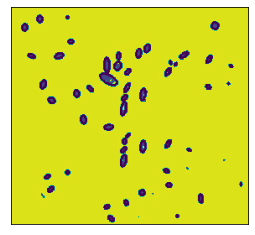

(<matplotlib.image.AxesImage at 0x26476cdee20>, ([], []), ([], []), None)

In [33]:
## ellipse fit
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

cv.imwrite('ellipsefit_input.jpg',result)
path = 'ellipsefit_input.jpg'
src = cv.imread(path,0)
blur = cv.GaussianBlur(src, (1, 1), 0)
ret, otsu = cv.threshold(blur, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
binary = cv.Canny(otsu, 80, 80 * 2)
k = np.ones((3, 3), dtype=np.uint8)
#binary = cv.morphologyEx(binary, cv.MORPH_DILATE, k)

# 轮廓发现
contours,_ = cv.findContours(binary, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
for c in range(len(contours)):
    if contours[c].size/2 >=5:
        # 椭圆拟合
        (cx, cy), (a, b), angle = cv.fitEllipse(contours[c])
        # 绘制椭圆
        cv.ellipse(src, (np.int32(cx), np.int32(cy)),
               (np.int32(a/2), np.int32(b/2)), angle, 0, 360, (0, 0, 255), 2, 8, 0)

plt.imshow(src),plt.xticks([]),plt.yticks([]),plt.show()  

In [34]:
cv.imwrite("output.jpg",src)

True

In [ ]:
## del alien object
import numpy as np

contour_area = list()
for i  in range(len(contours)):
    tmp_area = cv2.contourArea(contours[i],oriented = False)
    contour_area.append(tmp_area) 

In [17]:
if __name__ == "__main__":
 
    im = cv.imread("ellipsefit_input.jpg")    # 读图
    imgray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)    # 转灰度图
    _, thresh = cv.threshold(imgray, 130, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)  # 二值化 
    contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)  # 轮廓查找
 
 
    retval = cv.fitEllipse(contours[1])  # 取其中一个轮廓拟合椭圆
    img = cv.ellipse(im, retval, (0, 0, 255), thickness=2) # 在原图画椭圆
    cv.imshow("mark_ellipse[1]", img)
    print(retval) # 这里可以查看下fitEllipse的返回值的结构
    cv.waitKey()

error: OpenCV(4.5.2) :-1: error: (-5:Bad argument) in function 'ellipse'
> Overload resolution failed:
>  - ellipse() missing required argument 'center' (pos 2)
>  - ellipse() missing required argument 'center' (pos 2)
>  - ellipse() missing required argument 'box' (pos 2)
>  - ellipse() missing required argument 'box' (pos 2)
